### **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


### **Dataset Loader**

In [10]:
batch_size = 32
img_height = 150
img_width = 150

train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
        )
train_generator = train_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

Found 41573 images belonging to 28 classes.
Found 10377 images belonging to 28 classes.


In [11]:

print("Classes:")
print(validation_generator.class_indices)
print("Plants Names:")
plants_list=[]
for cls in validation_generator.class_indices:
    plants_list.append(cls.split("_")[0])
print(set(plants_list))


Classes:
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27}
Plants Names:
{'Pepper,', 'Raspberry', 'Peach', 'Blueberry', 'Cherry', 'Apple', 'Orang

## **CONVOLUTIONAL Neural Network**

In [ ]:
num_classes=28
model = Sequential([
 layers.RescalingRescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(256, activation='relu'),
 layers.Dense(num_classes)
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


## **Train CNN Model:**

In [13]:

history = model.fit(
    train_generator,
    epochs=21,
    validation_data=validation_generator,

)

Epoch 1/21
1300/1300 [==============================] - 408s 313ms/step - loss: 1.8144 - accuracy: 0.4456 - val_loss: 0.6338 - val_accuracy: 0.8053
Epoch 2/21
1300/1300 [==============================] - 410s 315ms/step - loss: 0.6315 - accuracy: 0.7972 - val_loss: 0.4431 - val_accuracy: 0.8517
Epoch 3/21
1300/1300 [==============================] - 410s 315ms/step - loss: 0.3987 - accuracy: 0.8720 - val_loss: 0.2717 - val_accuracy: 0.9096
Epoch 4/21
1300/1300 [==============================] - 410s 315ms/step - loss: 0.2940 - accuracy: 0.9068 - val_loss: 0.1773 - val_accuracy: 0.9388
Epoch 5/21
1300/1300 [==============================] - 410s 316ms/step - loss: 0.2392 - accuracy: 0.9221 - val_loss: 0.2163 - val_accuracy: 0.9289
Epoch 6/21
1300/1300 [==============================] - 409s 314ms/step - loss: 0.2145 - accuracy: 0.9319 - val_loss: 0.1312 - val_accuracy: 0.9572
Epoch 7/21
1300/1300 [==============================] - 412s 317ms/step - loss: 0.1840 - accuracy: 0.9422 - val_

#### Save Model

In [15]:
model.save("model.hdf5")

### **Test Model**

Load Image:  Soybean___healthy/79922786-dc6d-4fc6-ae80-5da25042c28e___RS_HL 5121.JPG


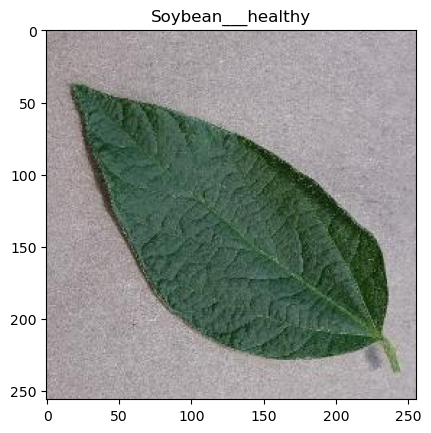

1/1 [==============================] - 1s 534ms/step
Predicted Class:  Soybean___healthy
Actual Class:  Soybean___healthy


In [2]:

import random
import cv2 as cv
import tensorflow as tf
model_test = tf.keras.models.load_model('model.hdf5')
dir = "PlantVillage"
sub_dir = random.sample(os.listdir(dir), k=1)[0]
image = random.sample(os.listdir(dir+"/"+sub_dir), k=1)[0]

print("Load Image: ",sub_dir+"/"+image)
data = cv.imread(dir+"/"+sub_dir+"/"+image)
data = cv.cvtColor(data, cv.COLOR_BGR2RGB)
# Show Image
plt.figure()
plt.imshow(data)
plt.title(sub_dir)
plt.show()
# Preprocess Data
im_res = cv.resize(data, (150, 150))
im_res = np.reshape(im_res, [1, 150,150,3])
# Prediction
result = model_test.predict(im_res)
predicted_class = sorted(os.listdir(dir))[np.argmax(result[0])]
print("Predicted Class: ", predicted_class)
print("Actual Class: ", sub_dir)